## CYBER SECURITY INTRUSION
Cybersecurity intrusion refers to any unauthorized activity that attempts to compromise the confidentiality, integrity, or availability of a computer system, network, or digital asset. Intrusions can range from basic phishing attacks and malware infections to sophisticated breaches involving advanced persistent threats (APTs). These intrusions are often carried out by cybercriminals, hackers, or hostile entities seeking to steal data, disrupt operations, or gain unauthorized control over systems.

In today’s digitally connected world, the threat of cybersecurity intrusions has grown significantly, making intrusion detection and prevention a critical aspect of modern cybersecurity strategies. Organizations must adopt layered security measures, conduct regular system monitoring, and implement effective response protocols to protect against these evolving threats.

## Loading/ Cleaning the data
* Loading the data 
* Checking for nulls 
* Checking for duplicates

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import (train_test_split, GridSearchCV, cross_val_score)
from sklearn.preprocessing import (LabelEncoder, StandardScaler)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, classification_report, recall_score, silhouette_score) 
from sklearn.cluster import KMeans, DBSCAN
import plotly.express as px
from sklearn.feature_selection import RFE
import joblib

In [2]:
#loading the dataset as 'data'

data= pd.read_csv(r'C:\Users\FAWAZ\Documents\AI-ML\cybersecurity_intrusion_data.csv')

In [3]:
#viewing the first 5 rows of the dataset
data.head()

,Timestamp,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,01/01/2023 00:00,SID_00001,599.0,TCP,4.0,492.983263,DES,0.606818,1.0,Edge,0.0,1.0
1,01/01/2023 01:00,SID_00002,472.0,TCP,3.0,1557.996461,DES,0.301569,0.0,Firefox,0.0,0.0
2,01/01/2023 02:00,SID_00003,629.0,TCP,3.0,75.044262,DES,0.739164,2.0,Chrome,0.0,1.0
3,01/01/2023 03:00,SID_00004,804.0,UDP,4.0,601.248835,DES,0.123267,0.0,Unknown,0.0,1.0
4,01/01/2023 04:00,SID_00005,453.0,TCP,5.0,532.540888,AES,0.054874,1.0,Firefox,0.0,0.0


In [4]:
data.head()

,Timestamp,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,01/01/2023 00:00,SID_00001,599.0,TCP,4.0,492.983263,DES,0.606818,1.0,Edge,0.0,1.0
1,01/01/2023 01:00,SID_00002,472.0,TCP,3.0,1557.996461,DES,0.301569,0.0,Firefox,0.0,0.0
2,01/01/2023 02:00,SID_00003,629.0,TCP,3.0,75.044262,DES,0.739164,2.0,Chrome,0.0,1.0
3,01/01/2023 03:00,SID_00004,804.0,UDP,4.0,601.248835,DES,0.123267,0.0,Unknown,0.0,1.0
4,01/01/2023 04:00,SID_00005,453.0,TCP,5.0,532.540888,AES,0.054874,1.0,Firefox,0.0,0.0


In [5]:
#checking information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            9537 non-null   object 
 1   session_id           9537 non-null   object 
 2   network_packet_size  9537 non-null   float64
 3   protocol_type        9537 non-null   object 
 4   login_attempts       9537 non-null   float64
 5   session_duration     9537 non-null   float64
 6   encryption_used      7571 non-null   object 
 7   ip_reputation_score  9537 non-null   float64
 8   failed_logins        9537 non-null   float64
 9   browser_type         9537 non-null   object 
 10  unusual_time_access  9537 non-null   float64
 11  attack_detected      9537 non-null   float64
dtypes: float64(7), object(5)
memory usage: 1.4+ MB


In [6]:
#checking the descriptive statistics of the data
data.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [7]:
#dropping the least important column
data.drop(['session_id'], axis= 1, inplace= True)

from row 9537 till the end were null values 

In [8]:
#checking for nulls
data.isna().sum()

Timestamp              5463
network_packet_size    5463
protocol_type          5463
login_attempts         5463
session_duration       5463
encryption_used        7429
ip_reputation_score    5463
failed_logins          5463
browser_type           5463
unusual_time_access    5463
attack_detected        5463
dtype: int64

In [9]:
# dropping all nulls from cell 9537
data.drop(data.iloc[9537:15001].index, inplace= True)

In [10]:
# checking for nulls
data.isna().sum()

Timestamp                 0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [11]:
# flllng encryption used with its mode
data['encryption_used']= data['encryption_used'].fillna(data['encryption_used'].mode()[0])

In [12]:
# checking shape of dataset
data.shape

(9537, 11)

In [13]:
#checking for duplicates
data.duplicated().sum()

np.int64(0)

In [14]:
#assigning cat to store categorical data and num to store numerical
cat= data.select_dtypes('object')
num= data.select_dtypes('number')

In [15]:
#categorical columns
cat.columns

Index(['Timestamp', 'protocol_type', 'encryption_used', 'browser_type'], dtype='object')

In [16]:
#numerical columns
num.columns

Index(['network_packet_size', 'login_attempts', 'session_duration',
       'ip_reputation_score', 'failed_logins', 'unusual_time_access',
       'attack_detected'],
      dtype='object')

### Univariate Analysis

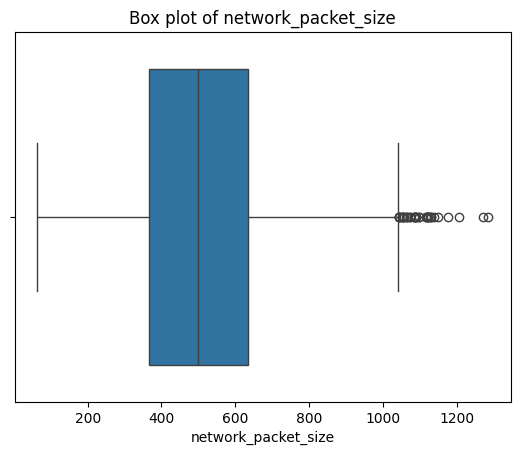

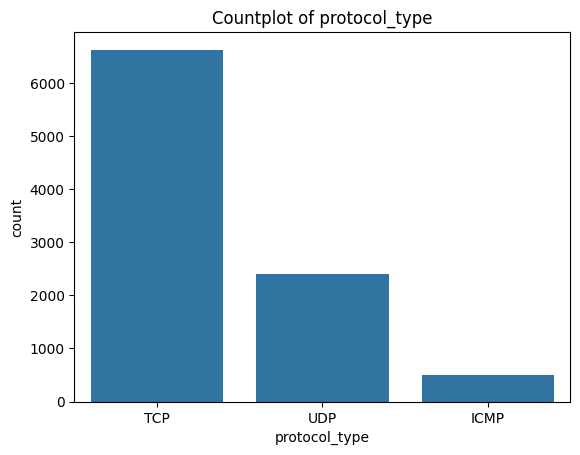

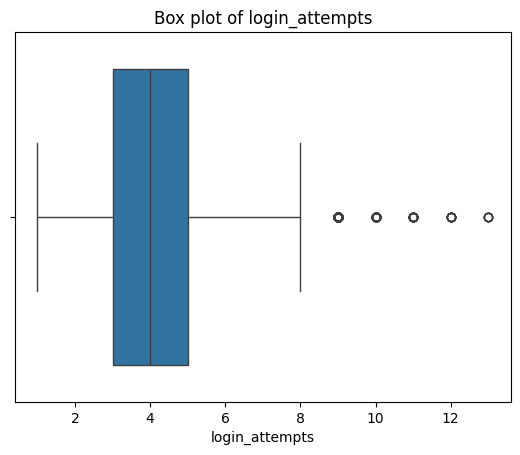

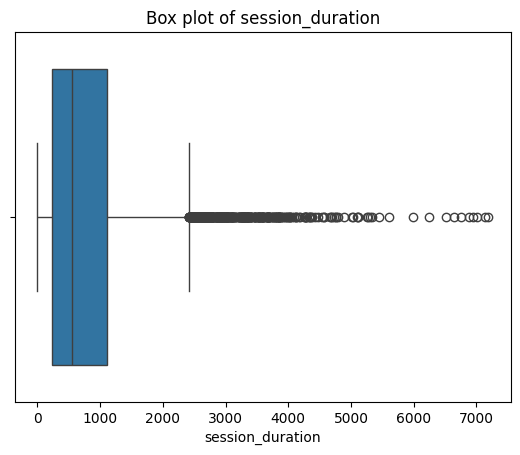

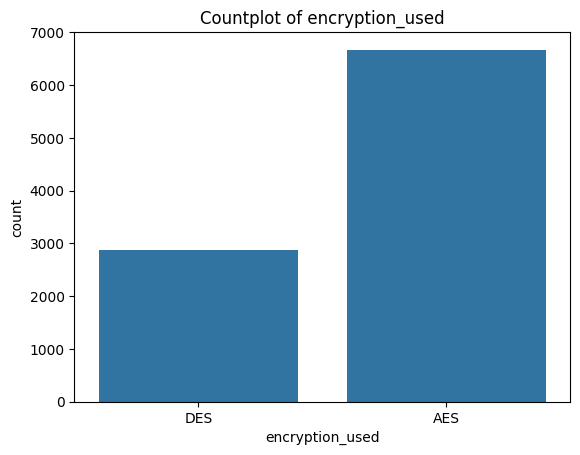

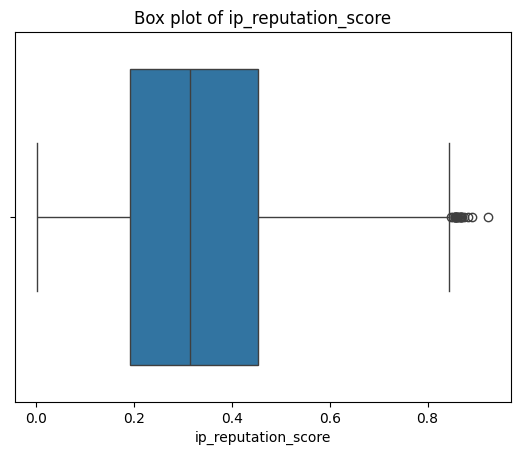

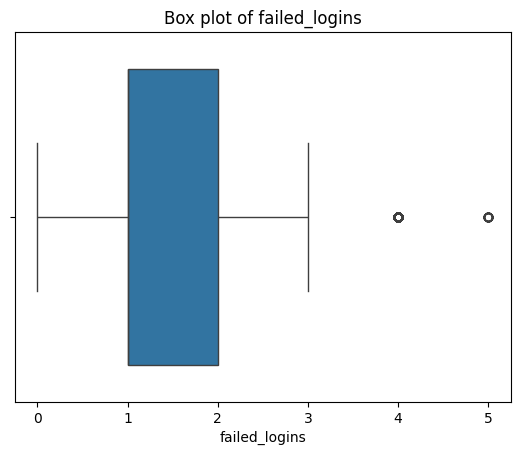

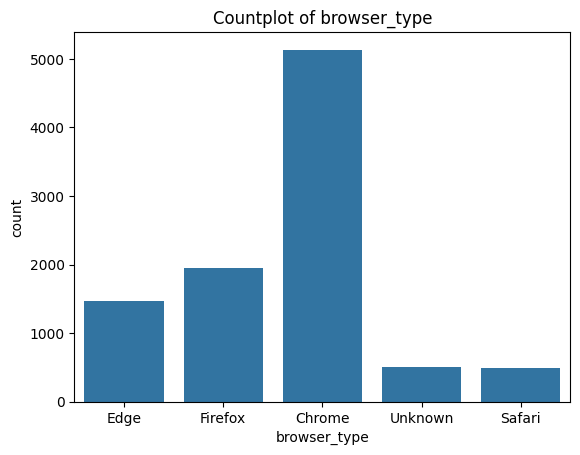

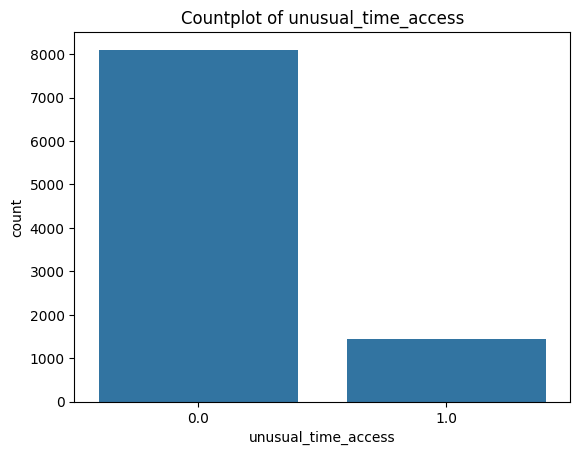

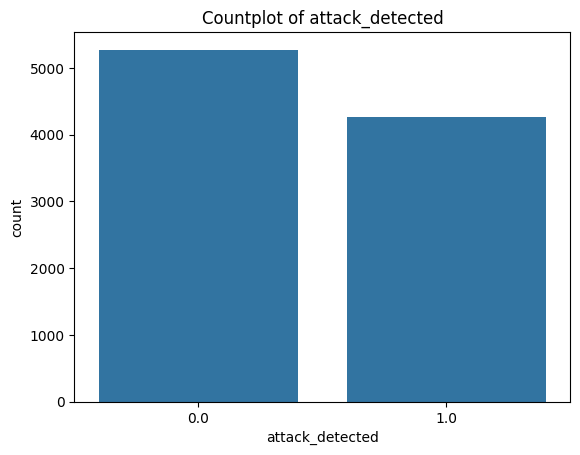

In [17]:
# for loop to visualize each column (boxplot and countplot)
for i in data.columns:
    if i in cat.columns or i in ['unusual_time_access','attack_detected']:
        if i != 'Timestamp':
            sns.countplot(data, x= i)
            plt.title(f'Countplot of {i}')
            plt.show()
    elif i in num.columns:
        if i not in ['unusual_time_access','attack_detected']:
            sns.boxplot(data, x= i)
            plt.title(f'Box plot of {i}')
            plt.show()

### Bivariate Analysis

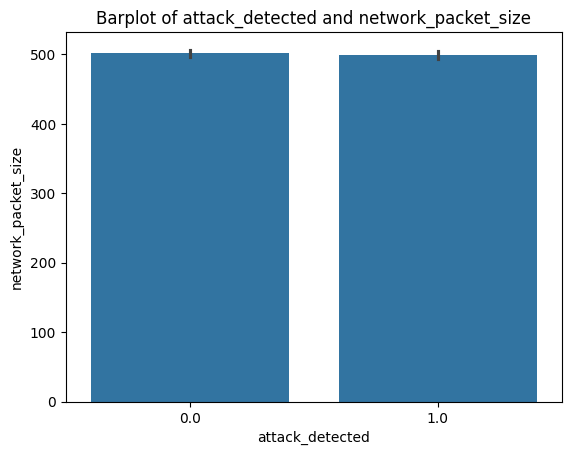

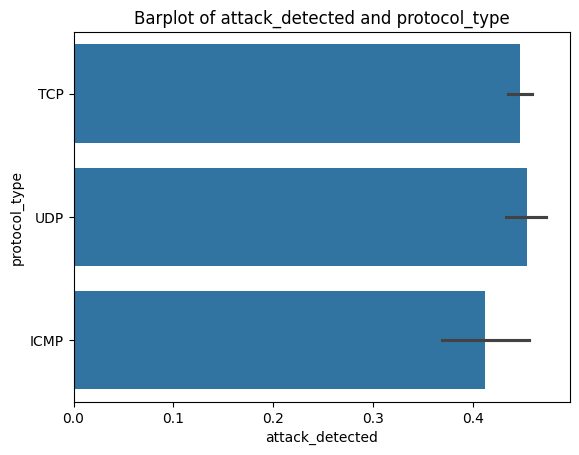

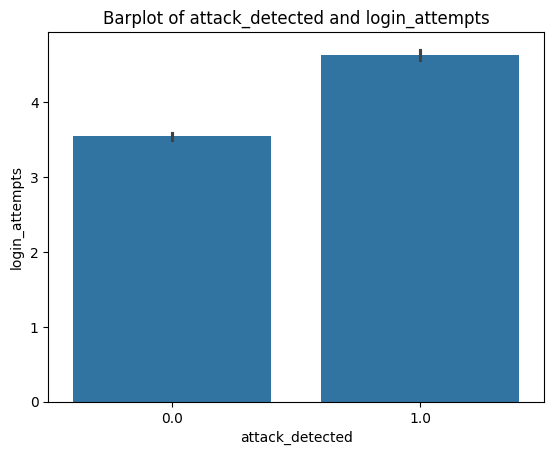

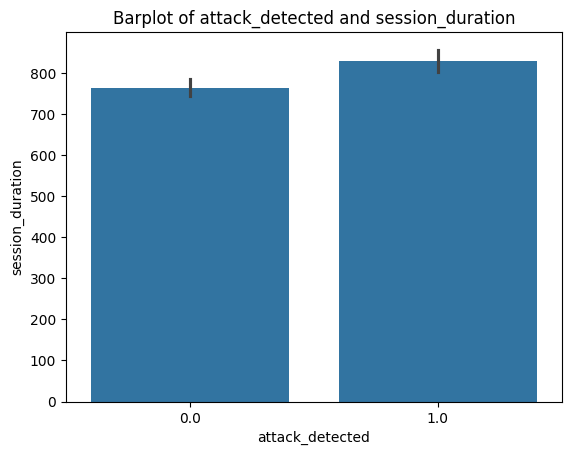

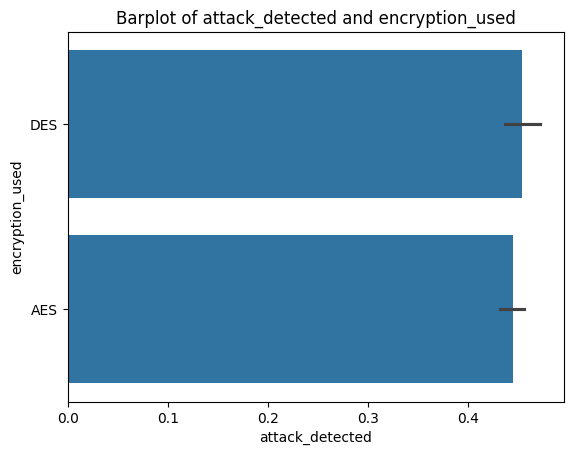

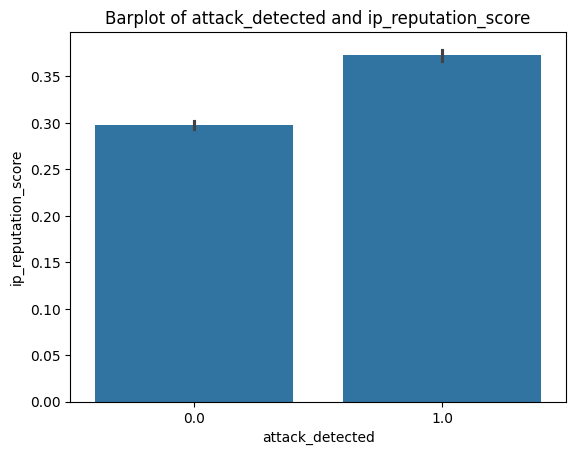

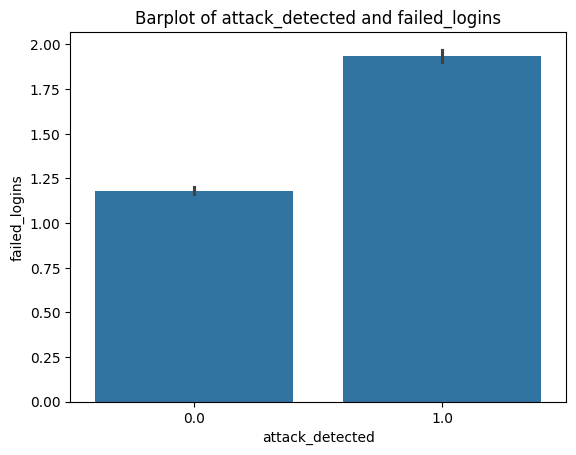

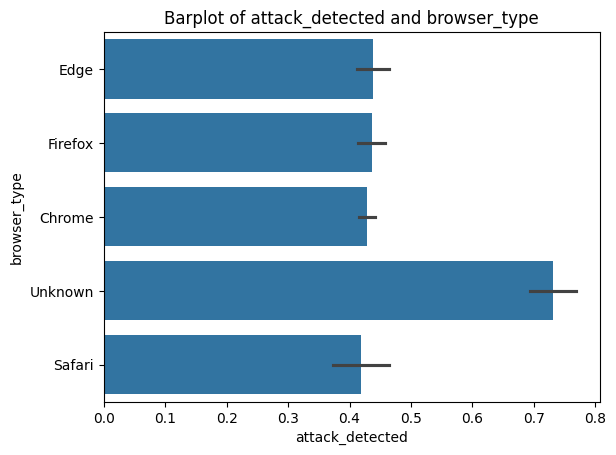

In [18]:
# for loop to visualize 
for i in data.columns:
    if i in cat.columns:
        if i != 'Timestamp' or i in ['unusual_time_access','attack_detected']:
            sns.barplot(data, x= 'attack_detected', y= i)
            plt.title(f'Barplot of attack_detected and {i}')
            plt.show()
    elif i in num.columns and i not in ['unusual_time_access','attack_detected']:
        sns.barplot(data, x= 'attack_detected', y= i)
        plt.title(f'Barplot of attack_detected and {i}')
        plt.show()

## Building model
Models used:
* Logistic Regression Model
* Random Forest Model
* Support Vector Classifier Model
* XGboost Classifier Model

In [19]:
# label enconding categorical variables
le= LabelEncoder()
for i in cat.columns:
    if i != 'Timestamp':
        data[i]= le.fit_transform(data[i])

In [20]:
# splitting data 
X= data.drop(['attack_detected', 'Timestamp'], axis=1)
y= data['attack_detected']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.2, stratify= y)


In [21]:
#scaling the training split
stdsc= StandardScaler()
X_train= stdsc.fit_transform(X_train)
X_test= stdsc.fit_transform(X_test)

In [22]:
# function for evaluating model performance
def evaluate(model):
    pred= model.predict(X_test)
    cla= classification_report(y_test, pred)
    acc= accuracy_score(y_test, pred)
    pri= precision_score(y_test, pred)
    rec= recall_score(y_test, pred)
    print(f'Accuracy is {acc:.2f}')
    print(f'Precision is {pri:.2f}')
    print(f'Recall is {rec:.2f}')
    print(cla)

In [23]:
# Logistic regression model
lr = LogisticRegression(random_state= 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [24]:
evaluate(lr)

Accuracy is 0.72
Precision is 0.70
Recall is 0.66
              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76      1055
         1.0       0.70      0.66      0.68       853

    accuracy                           0.72      1908
   macro avg       0.72      0.72      0.72      1908
weighted avg       0.72      0.72      0.72      1908



In [25]:
#applying features engineering RFE
rfe= RFE(lr, n_features_to_select= 5)
rfe.fit(X_train, y_train)

X_train_selected= rfe.transform(X_train)
X_test_selected= rfe.transform(X_test)

In [26]:
#evaluating after RFE
lr.fit(X_train_selected, y_train)
pred= lr.predict(X_test_selected)
cla= classification_report(y_test, pred)
print(cla)

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76      1055
         1.0       0.71      0.66      0.68       853

    accuracy                           0.73      1908
   macro avg       0.72      0.72      0.72      1908
weighted avg       0.72      0.73      0.72      1908



After applying RFE (Recurrsive Feature Extraction) the values remained the same except for 5, where the values of the precision and accuracy both increased by a unit

In [27]:
# random forest model
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
evaluate(rf)

Accuracy is 0.88
Precision is 0.99
Recall is 0.75
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      1055
         1.0       0.99      0.75      0.85       853

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908



In [29]:
#hyperparamter tuning using GridSearchCV
param_grid1= {
    'n_estimators': [200, 250, 300],
    'min_samples_leaf': [20, 30, 40],
    'min_samples_split': [100, 150, 200],
    'max_depth': [65, 85, 105]
}
gs1= GridSearchCV(rf, param_grid=param_grid1, verbose= True, cv= 5, scoring= 'f1')
gs1.fit(X_train, y_train)
print(gs1.best_estimator_)
print(gs1.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
RandomForestClassifier(max_depth=65, min_samples_leaf=30, min_samples_split=100,
                       n_estimators=200, random_state=42)
0.8656352585095656


In [30]:
evaluate(gs1)

Accuracy is 0.88
Precision is 1.00
Recall is 0.74
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      1055
         1.0       1.00      0.74      0.85       853

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908



No much changes only the precision increased, that too by 1 unit

In [31]:
# xgboost model
xgb= XGBClassifier(random_state= 42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [32]:
evaluate(xgb)

Accuracy is 0.86
Precision is 0.97
Recall is 0.71
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      1055
         1.0       0.97      0.71      0.82       853

    accuracy                           0.86      1908
   macro avg       0.89      0.85      0.85      1908
weighted avg       0.88      0.86      0.86      1908



In [33]:
param_grid2= {
    'n_samples': [100, 150, 200],
    'max_depth': [20, 25, 30],
    'sub_sample': [0.8],
    'learning_rate': [0.1, 0.2, 0.3]
}
gs2= GridSearchCV(xgb, param_grid=param_grid2, cv= 5, verbose= True)
gs2.fit(X_train, y_train)
print(gs2.best_estimator_)
print(gs2.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=30,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, n_samples=100, ...)
0.8853045141052359


In [34]:
evaluate(gs2)

Accuracy is 0.86
Precision is 0.98
Recall is 0.70
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89      1055
         1.0       0.98      0.70      0.82       853

    accuracy                           0.86      1908
   macro avg       0.89      0.84      0.85      1908
weighted avg       0.88      0.86      0.86      1908



This time the values dropped for recall but precision rose; all by 1 unit

In [35]:
# fitting the dataset into the SVM model 
svm= SVC(random_state= 42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [36]:
evaluate(svm)

Accuracy is 0.86
Precision is 0.93
Recall is 0.75
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89      1055
         1.0       0.93      0.75      0.83       853

    accuracy                           0.86      1908
   macro avg       0.88      0.85      0.86      1908
weighted avg       0.87      0.86      0.86      1908



In [37]:
# hyperparameter tuning using GridSearchCV
param_grid3= {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': [0.01 ,0.1, 1]
}
gs3= GridSearchCV(svm, param_grid=param_grid3, cv= 5, verbose= True)
gs3.fit(X_train, y_train)
print(gs3.best_estimator_)
print(gs3.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, gamma=0.1, random_state=42)
0.8784893969017897


In [38]:
evaluate(gs3)

Accuracy is 0.87
Precision is 0.96
Recall is 0.75
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      1055
         1.0       0.96      0.75      0.84       853

    accuracy                           0.87      1908
   macro avg       0.89      0.86      0.87      1908
weighted avg       0.89      0.87      0.87      1908



# Clustering Model

Model used
* Kmeans Clustering

Clustering the data points of the dataset may help provide insight in the data that can make attacks on a system easily detectable making it easier to find a way to prevent such attacks from ever occuring

In [39]:
# dropping the time stamp coloumn
data.drop(['Timestamp'], inplace= True, axis= 1)

In [40]:
# checking for numerical columns
data.head()

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599.0,1,4.0,492.983263,1,0.606818,1.0,1,0.0,1.0
1,472.0,1,3.0,1557.996461,1,0.301569,0.0,2,0.0,0.0
2,629.0,1,3.0,75.044262,1,0.739164,2.0,0,0.0,1.0
3,804.0,2,4.0,601.248835,1,0.123267,0.0,4,0.0,1.0
4,453.0,1,5.0,532.540888,0,0.054874,1.0,2,0.0,0.0


In [41]:
# assigning 3 numerical columns to a new variable
data_new = data[['network_packet_size', 'ip_reputation_score', 'session_duration']]
data_new

,network_packet_size,ip_reputation_score,session_duration
0,599.0,0.606818,492.983263
1,472.0,0.301569,1557.996461
2,629.0,0.739164,75.044262
3,804.0,0.123267,601.248835
4,453.0,0.054874,532.540888
...,...,...,...
9532,194.0,0.517737,226.049889
9533,380.0,0.408485,182.848475
9534,664.0,0.359200,35.170248
9535,406.0,0.537417,86.664703


In [42]:
# plotting a 3d scatterplot of the selected columns
labels= {
    'x': 'ip_reputation_score', 
    'y' :'network_packet_size', 
    'z': 'session_duration',
}
fig = px.scatter_3d(data, x= 'ip_reputation_score', 
                    y= 'network_packet_size', z= 'session_duration', labels=labels, width= 1200, height= 800)
fig.show()

In [43]:
# determining the optimum value for k 
inertia= []
sil_score= []
no_cluster= [i for i in range(2, 11)]

for i in no_cluster: 
    kmodel = KMeans(n_clusters= i, random_state= 42)
    kmodel.fit(data_new)
    inertia.append(kmodel.inertia_)
    sil_score.append(silhouette_score(data_new, kmodel.labels_))

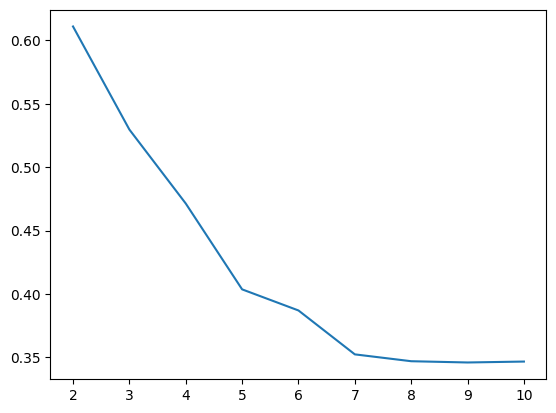

In [44]:
#lineplot of silhouette score vs number of clusters
sns.lineplot(y=sil_score, x= no_cluster)
plt.show()

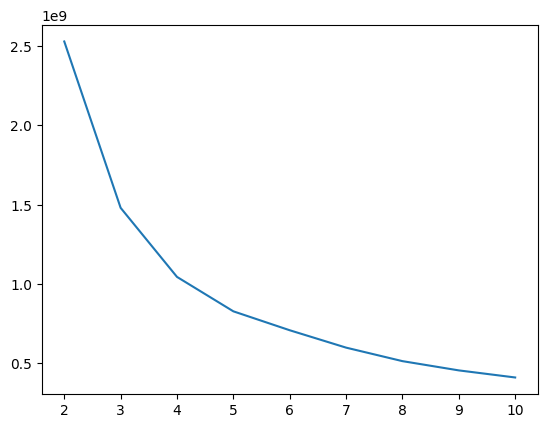

In [45]:
#lineplot of inertia vs number of clusters
sns.lineplot(y=inertia, x= no_cluster)
plt.show()

In [46]:
# fitting model into selected column
model = KMeans(n_clusters = 3, random_state= 42)
model.fit(data_new)

KMeans(n_clusters=3, random_state=42)

In [47]:
# creating a new column for the clusters
data['cluster'] = model.labels_

In [48]:
# plotting a scatter 3d of the selected columns as clusters
label= {
    'x': 'ip_reputation_score', 
    'y': 'network_packet_size',
    'z': 'session_duration'
}

fig = px.scatter_3d(data, x= 'ip_reputation_score', 
                    y= 'network_packet_size', z= 'session_duration', labels= label, color= 'cluster', width= 1200, height= 800)
fig.show()

## Labels
* Label 0: This cluster represents data points with network packet size between 0kb and 1200kb, ip reputation score between 0 and 1.0, and session duration less than 1000. Most likely regular user activity.
* Label 1: This cluster represents data points with network packet size between 0kb and 1200kb, ip reputation score between 0 and 1.0, and session duration between 1000 and 2000. Also regular users but with longer session(were active longer than label 0)
* Label 2:This cluster represents data points with network packet size between 0kb and 1000kb with outliers lying outside the 1000kb mark, ip reputation score between 0 and 0.8 with few outliers beyound 8, and session duration above 2000 most clustered between 2000 and 4000 and few points(outliers) above 4000. Deviates from normal, with multiple outliers, most likely a malicious login.

The KMeans algorithm helped identify 3 clusters representing different patterns of network behaviour. While cluster 0 and 1 reflect normal user activity, cluster 2 contained several anomalous indications such as higher IP score,and larger than normal packet sizes. This characteristics align with intrusion patterns suggesting that cluster 2 may contain malicious sessions and should be prioritized for further threat analysis.

In [49]:
# saving the best model 
joblib.dump(gs1, 'CYBER_SECURITY_MODEL.joblib')

['CYBER_SECURITY_MODEL.joblib']

## Conclusion
The model identifies threats by checking for certin information on the login/session and using those information to tell if the session was a malicious one or a regular user session